In [7]:
# Imported Libraries
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import csv
import math

         date  sales
0  2018-01-01  23923
1  2018-02-01  12531
2  2018-03-01  28479
3  2018-04-01  31897
4  2018-05-01  17087
5  2018-06-01  34175
6  2018-07-01  15948
7  2018-08-01  36454
8  2018-09-01  45567
9  2018-10-01  33036
10 2018-11-01  52403
11 2018-12-01  48985
12 2019-01-01  36331
13 2019-02-01  25950
14 2019-03-01  25950
15 2019-04-01  38926
16 2019-05-01  36331
17 2019-06-01  50604
18 2019-07-01  33736
19 2019-08-01  27248
20 2019-09-01  40223
21 2019-10-01  27248
22 2019-11-01  18165
23 2019-12-01  54496
24 2020-01-01  36467
25 2020-02-01  16207
26 2020-03-01  40519
27 2020-04-01  10805
28 2020-05-01  13506
29 2020-06-01  28363
30 2020-07-01  33766
31 2020-08-01  44571
32 2020-09-01  41870
33 2020-10-01  45922
34 2020-11-01  49974
35 2020-12-01  41870
36 2021-01-01  38240
37 2021-02-01  25904
38 2021-03-01  87582
39 2021-04-01  75246
40 2021-05-01  57976
41 2021-06-01  70312
42 2021-07-01  65378
43 2021-08-01  69078
44 2021-09-01  59210
45 2021-10-01  81414
46 2021-11-01

<AxesSubplot:xlabel='date'>

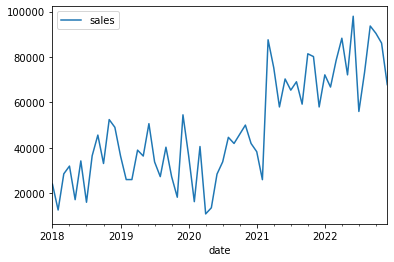

In [2]:
# Sales - Cleaning
sales = pd.read_csv('plugin_monthly_sales.csv')
sales = sales.drop("sales_before",axis=1)
sales = sales.drop("sales_next",axis=1)
yearly_multipliers = [1.139198301,1.297546012,1.350649351,1.233552632,1.076566125]

counter = 0
for i in yearly_multipliers:
    for j in range(12):
        sales["sales"][counter] *= i
        counter+=1

sales['date'] = pd.to_datetime(dict(year=sales.year, month=sales.month,day=1))
sales = sales.drop("year",axis=1)
sales = sales.drop("month",axis=1)
sales = sales[["date",'sales']]
print(sales)

sales.set_index("date",inplace=True)
sales.plot()

         date  price
0  2018-01-01  2.555
1  2018-02-01  2.587
2  2018-03-01  2.591
3  2018-04-01  2.757
4  2018-05-01  2.901
5  2018-06-01  2.891
6  2018-07-01  2.849
7  2018-08-01  2.836
8  2018-09-01  2.836
9  2018-10-01  2.860
10 2018-11-01  2.647
11 2018-12-01  2.366
12 2019-01-01  2.248
13 2019-02-01  2.309
14 2019-03-01  2.516
15 2019-04-01  2.798
16 2019-05-01  2.859
17 2019-06-01  2.716
18 2019-07-01  2.740
19 2019-08-01  2.621
20 2019-09-01  2.592
21 2019-10-01  2.627
22 2019-11-01  2.598
23 2019-12-01  2.555
24 2020-01-01  2.548
25 2020-02-01  2.442
26 2020-03-01  2.234
27 2020-04-01  1.841
28 2020-05-01  1.870
29 2020-06-01  2.082
30 2020-07-01  2.183
31 2020-08-01  2.182
32 2020-09-01  2.183
33 2020-10-01  2.158
34 2020-11-01  2.108
35 2020-12-01  2.195
36 2021-01-01  2.334
37 2021-02-01  2.501
38 2021-03-01  2.810
39 2021-04-01  2.858
40 2021-05-01  2.985
41 2021-06-01  3.064
42 2021-07-01  3.136
43 2021-08-01  3.158
44 2021-09-01  3.175
45 2021-10-01  3.291
46 2021-11-01

<AxesSubplot:xlabel='date'>

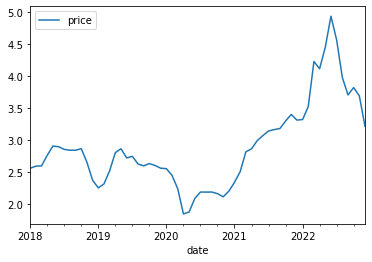

In [4]:
# Gas Prices - Cleaning
gas = pd.read_csv('gas_prices.csv')

gas['date'] = pd.to_datetime(dict(year=gas.year, month=gas.month,day=1))
gas = gas.drop("year",axis=1)
gas = gas.drop("month",axis=1)
gas = gas[["date",'price']]
print(gas)

gas.set_index("date",inplace=True)
gas.plot()

In [47]:
# Gas Prices - Granger Causality
test = 'ssr_chi2test'
gasCombine = pd.concat([sales, gas], axis=1)
gasCombine.columns = ['sales', 'prices']
gas_test = grangercausalitytests(gasCombine, 12)
# As lags increase, it decreases the statistical correlation


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0838  , p=0.0062  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=8.5168  , p=0.0035  , df=1
likelihood ratio test: chi2=7.9555  , p=0.0048  , df=1
parameter F test:         F=8.0838  , p=0.0062  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2666  , p=0.1136  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=4.9608  , p=0.0837  , df=2
likelihood ratio test: chi2=4.7601  , p=0.0925  , df=2
parameter F test:         F=2.2666  , p=0.1136  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9598  , p=0.4190  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=3.2825  , p=0.3501  , df=3
likelihood ratio test: chi2=3.1915  , p=0.3630  , df=3
parameter F test:         F=0.9598  , p=0.4190  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4715  , p=0.2259  , df_d

         date  disp_income
0  2018-01-01        43217
1  2018-02-01        43277
2  2018-03-01        43392
3  2018-04-01        43476
4  2018-05-01        43591
5  2018-06-01        43733
6  2018-07-01        43909
7  2018-08-01        44053
8  2018-09-01        44031
9  2018-10-01        44150
10 2018-11-01        44272
11 2018-12-01        44814
12 2019-01-01        44854
13 2019-02-01        44974
14 2019-03-01        44985
15 2019-04-01        44870
16 2019-05-01        44860
17 2019-06-01        44920
18 2019-07-01        44991
19 2019-08-01        45234
20 2019-09-01        45332
21 2019-10-01        45376
22 2019-11-01        45542
23 2019-12-01        45325
24 2020-01-01        45708
25 2020-02-01        45948
26 2020-03-01        45256
27 2020-04-01        51996
28 2020-05-01        49515
29 2020-06-01        49054
30 2020-07-01        49344
31 2020-08-01        47426
32 2020-09-01        47596
33 2020-10-01        47373
34 2020-11-01        46745
35 2020-12-01        46790
3

<AxesSubplot:xlabel='date'>

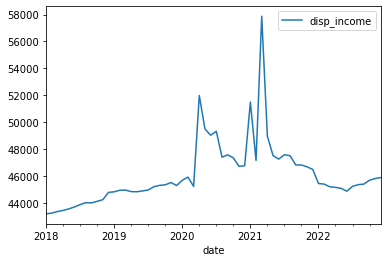

In [24]:
# Disposable Income - Cleaning
income = pd.read_csv('income.csv')

income['date'] = pd.to_datetime(dict(year=income.year, month=income.month,day=1))
income = income.drop("year",axis=1)
income = income.drop("month",axis=1)
income = income[["date",'disp_income']]
print(income)

income.set_index("date",inplace=True)
income.plot()

In [48]:
# Disposable Income - Granger Causality
test = 'ssr_chi2test'
incomeCombine = pd.concat([sales, income], axis=1)
incomeCombine.columns = ['sales', 'disp_income']
income_test = grangercausalitytests(incomeCombine, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1125  , p=0.7386  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=0.1185  , p=0.7307  , df=1
likelihood ratio test: chi2=0.1184  , p=0.7308  , df=1
parameter F test:         F=0.1125  , p=0.7386  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5121  , p=0.6021  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=1.1209  , p=0.5709  , df=2
likelihood ratio test: chi2=1.1102  , p=0.5740  , df=2
parameter F test:         F=0.5121  , p=0.6021  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8456  , p=0.4755  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=2.8918  , p=0.4086  , df=3
likelihood ratio test: chi2=2.8208  , p=0.4201  , df=3
parameter F test:         F=0.8456  , p=0.4755  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7330  , p=0.5740  , df_d

         date  dist_traveled
0  2018-01-01         3215.0
1  2018-02-01         3217.0
2  2018-03-01         3220.0
3  2018-04-01         3222.0
4  2018-05-01         3225.0
5  2018-06-01         3228.0
6  2018-07-01         3230.0
7  2018-08-01         3232.0
8  2018-09-01         3234.0
9  2018-10-01         3236.0
10 2018-11-01         3238.0
11 2018-12-01         3240.0
12 2019-01-01         3244.0
13 2019-02-01         3248.0
14 2019-03-01         3249.0
15 2019-04-01         3247.0
16 2019-05-01         3253.0
17 2019-06-01         3251.0
18 2019-07-01         3252.0
19 2019-08-01         3260.0
20 2019-09-01         3266.0
21 2019-10-01         3269.0
22 2019-11-01         3269.0
23 2019-12-01         3261.0
24 2020-01-01         3273.0
25 2020-02-01         3284.0
26 2020-03-01         3239.0
27 2020-04-01         3134.0
28 2020-05-01         3065.0
29 2020-06-01         3034.0
30 2020-07-01         3008.0
31 2020-08-01         2980.0
32 2020-09-01         2965.0
33 2020-10-01 

<AxesSubplot:xlabel='date'>

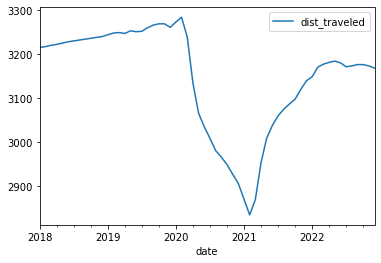

In [37]:
# Travel - Cleaning
travel = pd.read_csv('travel.csv')

travel['date'] = pd.to_datetime(dict(year=travel.year, month=travel.month,day=1))
travel = travel.drop("year",axis=1)
travel = travel.drop("month",axis=1)
travel = travel[["date",'dist_traveled']]
travel["dist_traveled"] = travel["dist_traveled"].str.replace(",","")
travel["dist_traveled"] = travel["dist_traveled"].astype(float)
print(travel)

travel.set_index("date",inplace=True)
travel.plot()

In [49]:
# Travel - Granger Causality
test = 'ssr_chi2test'
travelCombine = pd.concat([sales, travel], axis=1)
travelCombine.columns = ['sales', 'dist_traveled']
travel_test = grangercausalitytests(travelCombine, 16)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5286  , p=0.1174  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=2.6640  , p=0.1026  , df=1
likelihood ratio test: chi2=2.6056  , p=0.1065  , df=1
parameter F test:         F=2.5286  , p=0.1174  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6097  , p=0.2096  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=3.5231  , p=0.1718  , df=2
likelihood ratio test: chi2=3.4202  , p=0.1808  , df=2
parameter F test:         F=1.6097  , p=0.2096  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6276  , p=0.0604  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=8.9865  , p=0.0295  , df=3
likelihood ratio test: chi2=8.3448  , p=0.0394  , df=3
parameter F test:         F=2.6276  , p=0.0604  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0527  , p=0.1022  , df_d

         date  env_sent
0  2018-01-01    48.600
1  2018-02-01    48.800
2  2018-03-01    49.000
3  2018-04-01    49.250
4  2018-05-01    49.500
5  2018-06-01    49.750
6  2018-07-01    50.000
7  2018-08-01    50.250
8  2018-09-01    50.500
9  2018-10-01    50.750
10 2018-11-01    50.800
11 2018-12-01    51.000
12 2019-01-01    49.750
13 2019-02-01    48.500
14 2019-03-01    47.250
15 2019-04-01    46.000
16 2019-05-01    46.800
17 2019-06-01    47.700
18 2019-07-01    48.600
19 2019-08-01    49.400
20 2019-09-01    50.300
21 2019-10-01    51.100
22 2019-11-01    52.000
23 2019-12-01    52.400
24 2020-01-01    52.800
25 2020-02-01    53.200
26 2020-03-01    53.600
27 2020-04-01    54.000
28 2020-05-01    53.500
29 2020-06-01    53.000
30 2020-07-01    52.500
31 2020-08-01    52.000
32 2020-09-01    51.500
33 2020-10-01    51.000
34 2020-11-01    50.500
35 2020-12-01    50.000
36 2021-01-01    50.000
37 2021-02-01    50.000
38 2021-03-01    50.000
39 2021-04-01    51.167
40 2021-05-01   

<AxesSubplot:xlabel='date'>

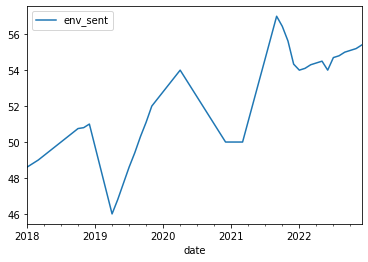

In [45]:
# Environment - Cleaning
env = pd.read_csv('environment.csv')

env['date'] = pd.to_datetime(dict(year=env.year, month=env.month,day=1))
env = env.drop("year",axis=1)
env = env.drop("month",axis=1)
env = env[["date",'env_sent']]
print(env)

env.set_index("date",inplace=True)
env.plot()

In [50]:
# Environment - Granger Causality
test = 'ssr_chi2test'
envCombine = pd.concat([sales, env], axis=1)
envCombine.columns = ['sales', 'env_sent']
env_test = grangercausalitytests(envCombine, 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5847  , p=0.0366  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=4.8303  , p=0.0280  , df=1
likelihood ratio test: chi2=4.6428  , p=0.0312  , df=1
parameter F test:         F=4.5847  , p=0.0366  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7966  , p=0.4562  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=1.7435  , p=0.4182  , df=2
likelihood ratio test: chi2=1.7178  , p=0.4236  , df=2
parameter F test:         F=0.7966  , p=0.4562  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7568  , p=0.5237  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=2.5881  , p=0.4596  , df=3
likelihood ratio test: chi2=2.5311  , p=0.4697  , df=3
parameter F test:         F=0.7568  , p=0.5237  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4173  , p=0.2429  , df_d